# 14 Neural Networks
Example taken from *Introduction to Machine Learning with Python* by Muller and Guido.  
You will need to install `mglearn` (`pip install mglearn`)  
mglearn github repo: https://github.com/amueller/mglearn

In [23]:
from sklearn.neural_network import MLPClassifier 
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

## Hotel Review Data
Neural Network with 20 units in the hidden layer manages to perfectly learn this dataset.  
Accuracy on training set is 100%. 

In [24]:
import pandas as pd
HR = pd.read_csv('HotelRevHelpfulnessV2.csv')
HR.head()

,aveHelpfulnessRatioUser,stdevHelpfulnessRatioUser,pcReviewsExceedMinHelpfulnessSupport,numReviewsUser,numReviewsHotel,ratingUser,numberSubRatingsUser,subRatingMeanUser,subRatingStdevUser,aveRatingUser,...,completeness_2,completeness_3,numberTermsEntry,percentageAlphaCharsEntry,fractionUpperCaseCharsEntry,fractionYouVsIEntry,numberTermsSummaryQuote,percentageAlphaCharsSummaryQuote,fractionUpperCaseCharsSummaryQuote,reviewHelpfulness
0,1.000000,0.000000,0.666667,3,16,5,4,4.000000,0.000000,4.333333,...,0,1,182,0.788474,0.025703,0.500000,6,0.815789,0.096774,good
1,0.772487,0.377321,0.500000,12,233,5,0,0.000000,0.000000,4.333333,...,0,0,158,0.791888,0.012594,0.500000,1,1.000000,0.083333,good
2,0.715473,0.300437,0.833333,12,302,4,7,3.714286,0.755929,4.166667,...,0,3,59,0.799639,0.024831,0.333333,4,0.828571,0.034483,bad
3,0.521250,0.481675,0.222222,36,6,1,4,1.000000,0.000000,3.527778,...,0,0,95,0.782212,0.029155,0.500000,2,0.800000,0.062500,bad
4,0.603175,0.246926,1.000000,2,271,3,0,0.000000,0.000000,3.500000,...,0,0,43,0.805128,0.028662,0.000000,1,1.000000,0.142857,bad


In [25]:
y = HR.pop('reviewHelpfulness').values
scaler = preprocessing.StandardScaler().fit(HR)
X_scaled = scaler.transform(HR)

In [26]:
mlp = MLPClassifier(max_iter=2000, random_state=2,
                    hidden_layer_sizes=[20])
mlp.fit(X_scaled, y)
acc = mlp.score(X_scaled, y)
print("Accuracy on training set: {:.2f}".format(acc)) 

Accuracy on training set: 1.00


Looking at the weights in a heatmap, it seems some features are not influential, e.g. `hotelId` and `completeness3`.

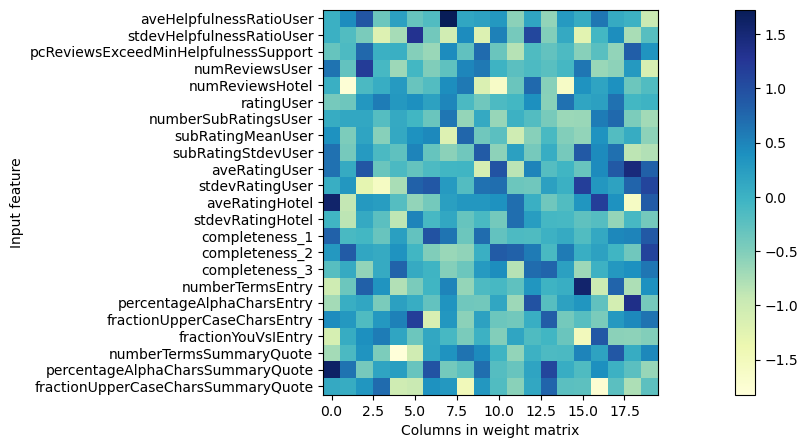

In [27]:
features = HR.columns
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='YlGnBu')
plt.yticks(range(len(features)), features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

## Holdout testing
- Divide the data into train and test splits
- Build multiple models with different stopping conditions (iterations)
- Overfitting increases with training
- Regularization (set alpha to say 5) stops overfitting. 

In [28]:
X = HR.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/3, random_state=1)

In [29]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(random_state=0,max_iter=1000)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test))) 

Accuracy on training set: 1.000
Accuracy on test set: 0.654


In [30]:
eval_range = range(10,200,10)
tr_scores = []
ts_scores = []

# alpha = 0.15 shows overfitting
# alpha = 5 provides good regularization (little overfitting)
for i in eval_range:
    mlp = MLPClassifier(random_state=0, alpha = 0.15 ,max_iter=i)
    mlp.fit(X_train_scaled, y_train)
#    print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
#    print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test))) 
    tr_scores.append(mlp.score(X_train_scaled, y_train))
    ts_scores.append(mlp.score(X_test_scaled, y_test))

/opt/anaconda3/envs/AI/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/AI/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/AI/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/AI/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/AI/lib/python3.12/si

(0.5, 1.0)

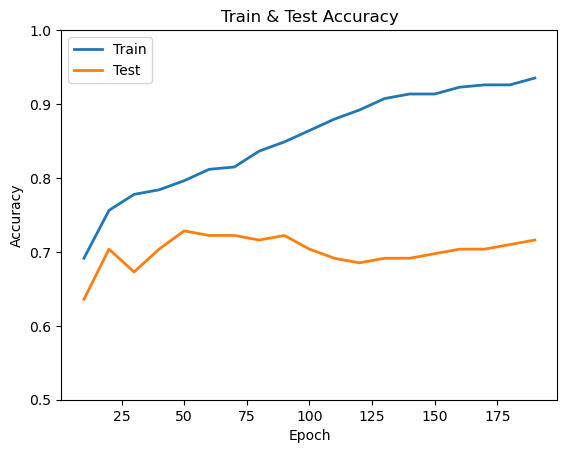

In [31]:
df = pd.DataFrame({'Train': tr_scores, 'Test': ts_scores}, index = eval_range) 
ax = df.plot(lw=2, title='Train & Test Accuracy')
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.set_ylim(0.5,1)

---
## Two Moons dataset
Using synthetic data generated using `make_moons` - two dimensions, 100 samples.  
Default MLPClassifier parameters:
- 1 hidden layer, 100 units
- learning_rate_init = 0.001
- max_iter = 200
- momentum = 0.9

Text(0, 0.5, 'Feature 1')

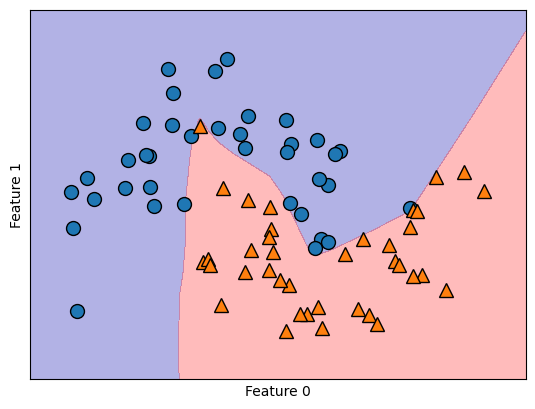

In [32]:
import mglearn

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                        random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [33]:
# Have a look at the default parameters. 
mlp

MLPClassifier(random_state=0, solver='lbfgs')

Reduce the number of units in the hidden layer to 3 - a much simpler model. 

Text(0, 0.5, 'Feature 1')

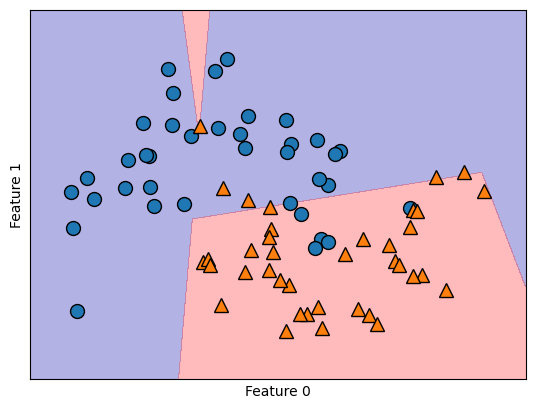

In [34]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[3])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Using two hidden layers, with 10 units each.

Text(0, 0.5, 'Feature 1')

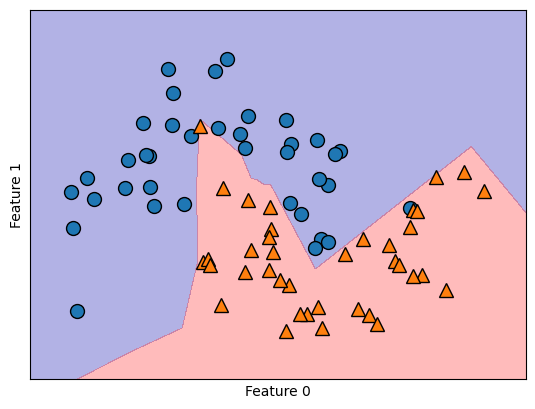

In [35]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                        hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Try different learning rates and different structures - 2 hidden layers with 10 or 100 nodes. 

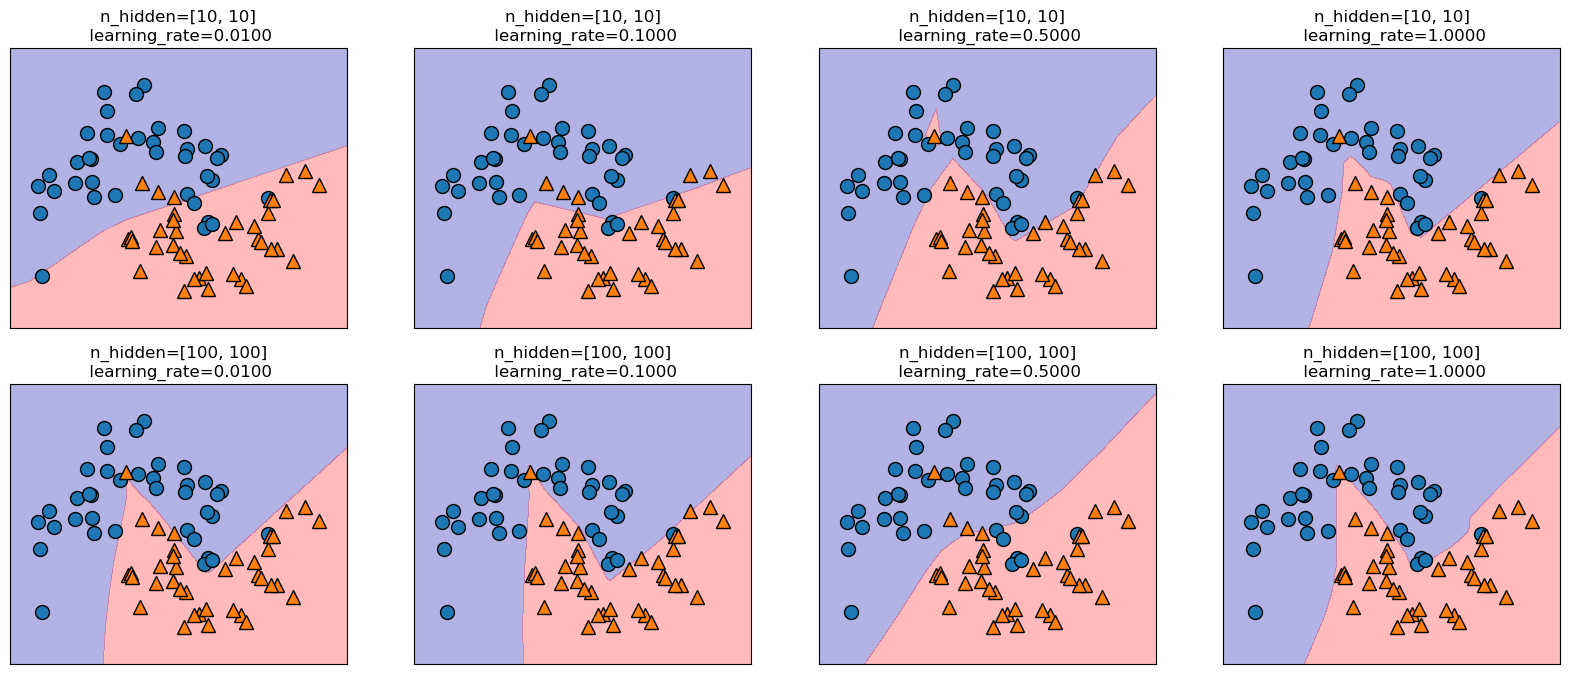

In [36]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8)) 
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, lr in zip(axx, [0.01, 0.1, 0.5, 1]):
        mlp = MLPClassifier(solver='sgd', random_state=0,
                                hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                                max_iter = 2000, learning_rate_init=lr)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax) 
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax) 
        ax.set_title("n_hidden=[{}, {}]\n learning_rate={:.4f}".format(
                          n_hidden_nodes, n_hidden_nodes, lr))

Different random initialisations will also produce quite different models. 

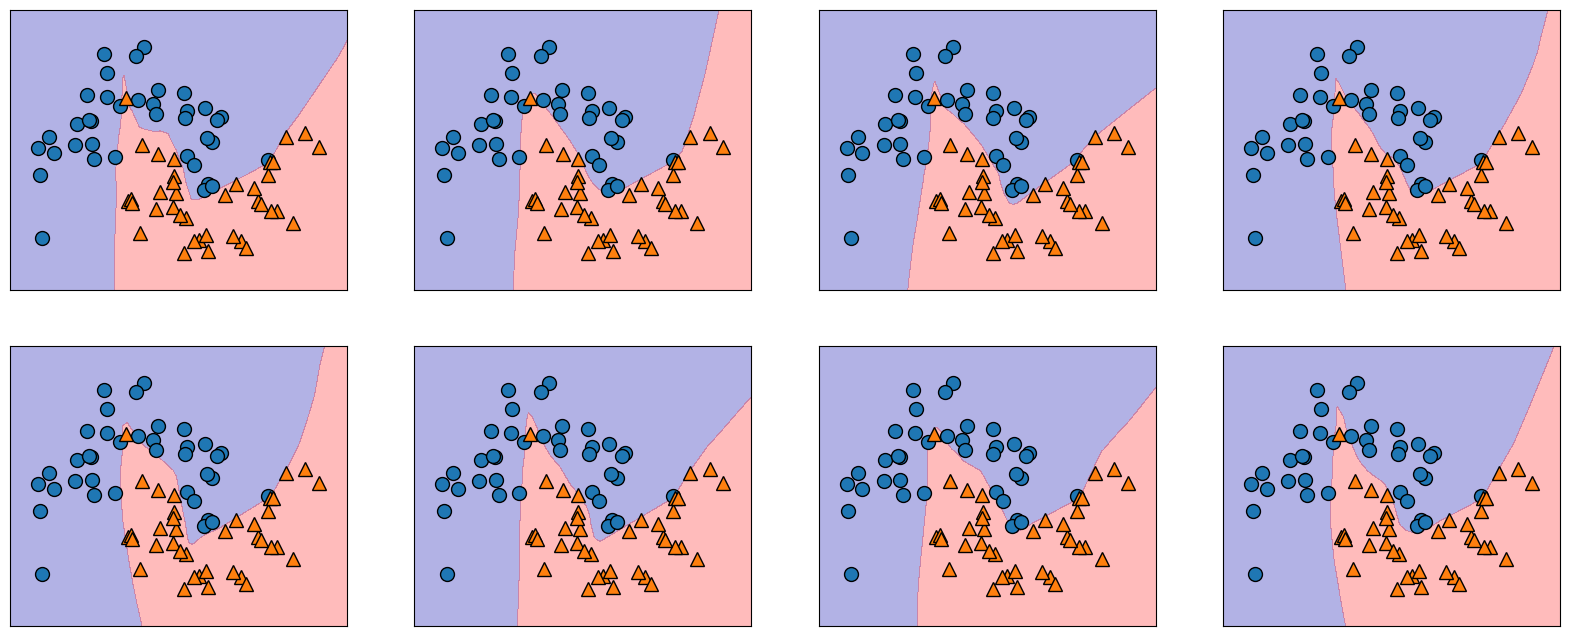

In [37]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8)) 
for i, ax in enumerate(axes.ravel()):
        mlp = MLPClassifier(solver='lbfgs', random_state=i,
                            hidden_layer_sizes=[100, 100])
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

---
## Diabetes data
This analaysis on the diabetes data is included to show that the overfitting is not just a problem with the Hotel Review data.

In [38]:
import pandas as pd
diabetesDF = pd.read_csv('diabetes.csv')
diabetesDF.head()

,preg,plas,pres,skin,insu,mass,pedi,age,neg_pos
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [39]:
y = diabetesDF.pop('neg_pos').values
X = diabetesDF.values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/3, random_state=1)

In [41]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(random_state=0,max_iter=100)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test))) 

Accuracy on training set: 0.795
Accuracy on test set: 0.789


/opt/anaconda3/envs/AI/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [42]:
eval_range = range(20,500,20)
tr_scores = []
ts_scores = []

for i in eval_range:
    mlp = MLPClassifier(random_state=0, alpha = 0.15 ,max_iter=i)
    mlp.fit(X_train_scaled, y_train)
#    print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
#    print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test))) 
    tr_scores.append(mlp.score(X_train_scaled, y_train))
    ts_scores.append(mlp.score(X_test_scaled, y_test))

/opt/anaconda3/envs/AI/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/AI/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/AI/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/AI/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/AI/lib/python3.12/si

In [43]:
df = pd.DataFrame({'Train': tr_scores, 'Test': ts_scores}, index = eval_range) 

Text(0, 0.5, 'Accuracy')

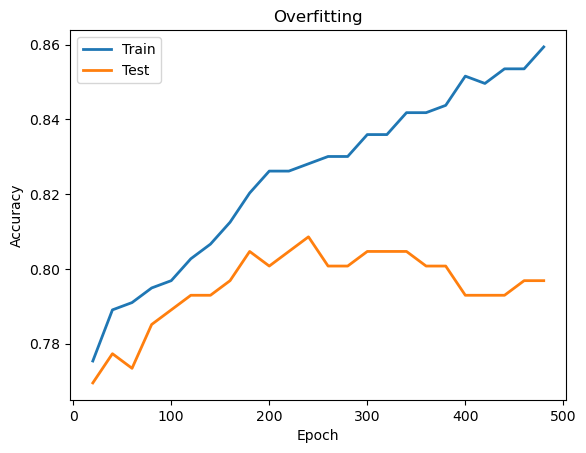

In [44]:
df = pd.DataFrame({'Train': tr_scores, 'Test': ts_scores}, index = eval_range) 
ax = df.plot(lw=2, title='Overfitting')
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")

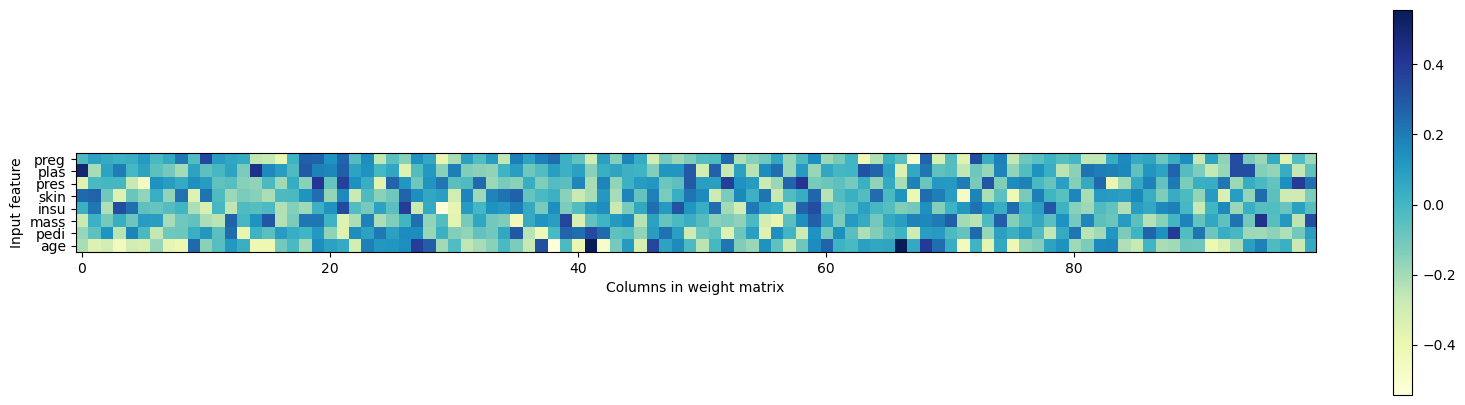

In [45]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='YlGnBu')
plt.yticks(range(len(diabetesDF.columns)), diabetesDF.columns)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()